In [1]:
#have to read the GW.pdf file which is stored in the Epidemic folder 
#then we can start coding this lab 

In [2]:
# we don't have to generate the distro ourselves and it's ok if we use libraries 

In [3]:
#keeps on going for lambda equal to 1.3
#reproduction probability for generation= m ** i
#extinction prob = 1/1+ (frequency * number)
#how should we compute qi?
#extinction probability is increasing 
#what we've fond is the surviving probability 
#lambda is equal to m
#1- the probability of survival till an specific generation = probability of extinction untill that generation
# plot => x = generation and y = extinctintion prob 
# extinctino prob = numers / runs 

# Description

14 - Galton-Watson ProcessesWorkshop<br>
Through simulation evaluate the extinction probability within  generation  i  (q_i) and the asymptotic extinction  probability  (q) for  a Galton-Watson process in which the number of children of an individual Y is  distributed as a Poisson(lambda) R.V.  with lambda=0.6, 0.8, 0.9 0.95, 0.99, 1.01, 1.05, 1.1, 1.3.

Compare the results you  obtain with theoretical predictions, (by  finding numerically, when needed,  the solution of q= phi_Y(q)) 

In particular, you are requested to specify the stopping condition you have implemented in order to empirically "detect"   non-extinction condition.  Please try to provide a theoretical justification to such condition.

For the case  \lambda=0.8, obtain the empirical distribution (histogram) on the number of nodes in the tr

In [4]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [5]:
lambda_values=[0.6, 0.8, 0.9,0.95, 0.99, 1.01, 1.05, 1.1, 1.3]
np.random.seed(32)

In [6]:
generation_limit=20
runs=1000

In [7]:
#we should store all the generation that have survived untill the generation that is extinct 
# since technically we're storing the survived generations 
final_dict_lambda=defaultdict(list)
final_extinct_dict=defaultdict(list)
for lam in lambda_values:
    gen_dict_survive={}
    gen_dict_extinct={}
    for i in range(runs):
        generation_dict=defaultdict(list)
        generation = 0
        generation_dict[generation].append(np.random.poisson(lam)) # first person
        while (sum(generation_dict[generation])!=0) and  (generation<generation_limit):
            temp=generation+1
            for _ in range(sum(generation_dict[generation])):
                generation_dict[temp].append(np.random.poisson(lam))
#             print(generation_dict)
            generation= generation+1
        for j in range(generation):
            if j in gen_dict_survive.keys():
                gen_dict_survive[j]+=1
                gen_dict_extinct[j]-=1
                
            else:
                gen_dict_survive[j]=1
                gen_dict_extinct[j]=1000-1 # the number of extinctions is (the number of runs - number of survivals)
    final_dict_lambda[lam]=gen_dict_survive # to store the number of survivals 
    final_extinct_dict[lam]=gen_dict_extinct # to sotre the number of extinctions

#     print(generation_dict)

In [11]:
# final_dict_lambda

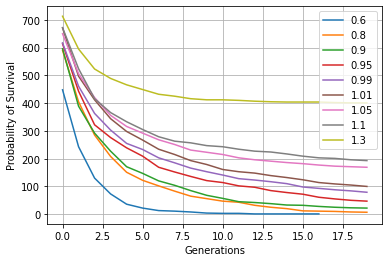

In [9]:
for k,v in final_dict_lambda.items():
#     plt.figure(figsize=(10,10))
    plt.plot(v.keys(),v.values(),label=f'{k}')
    plt.xlabel('Generations')
    plt.ylabel('Probability of Survival')
    plt.legend()
    plt.grid()

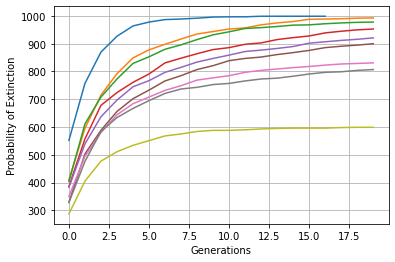

In [10]:
for k,v in final_extinct_dict.items():
#     plt.figure(figsize=(10,10))
    plt.plot(v.keys(),v.values(),label=f'{k}')
    plt.xlabel('Generations')
    plt.ylabel('Probability of Extinction')
    plt.grid()